In [1]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [2]:
print(train_data.head())


   Id          Artist Name       Track Name  Popularity  danceability  energy  \
0   1    Marina Maximilian       Not Afraid        37.0         0.334   0.536   
1   2       The Black Keys  Howlin' for You        67.0         0.725   0.747   
2   3  Royal & the Serpent          phuck u         NaN         0.584   0.804   
3   4   Detroit Blues Band      Missing You        12.0         0.515   0.308   
4   5         Coast Contra          My Lady        48.0         0.565   0.777   

    key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   9.0    -6.649     0       0.0381      0.378000               NaN   
1  11.0    -5.545     1       0.0876      0.027200            0.0468   
2   7.0    -6.094     1       0.0619      0.000968            0.6350   
3   NaN   -14.711     1       0.0312      0.907000            0.0213   
4   6.0    -5.096     0       0.2490      0.183000               NaN   

   liveness  valence    tempo  duration_in min/ms  time_signature  Class  
0    

In [3]:
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [4]:
print(train_data.describe())


                 Id    Popularity  danceability        energy           key  \
count  14396.000000  14063.000000  14396.000000  14396.000000  12787.000000   
mean    7198.500000     44.525208      0.543105      0.662422      5.953781   
std     4155.911573     17.418940      0.165517      0.235967      3.200013   
min        1.000000      1.000000      0.059600      0.001210      1.000000   
25%     3599.750000     33.000000      0.432000      0.508000      3.000000   
50%     7198.500000     44.000000      0.545000      0.699000      6.000000   
75%    10797.250000     56.000000      0.658000      0.861000      9.000000   
max    14396.000000    100.000000      0.989000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  14396.000000  14396.000000  14396.000000  14396.000000   
mean      -7.900852      0.640247      0.080181      0.246746   
std        4.057362      0.479944      0.085157      0.310922   
min      -39.952000      0.0

In [5]:
print(train_data.isnull().sum())


Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64


In [6]:
# Handle missing values in train_data
train_data['Popularity'].fillna(train_data['Popularity'].mean(), inplace=True)
train_data['key'].fillna(train_data['key'].mode()[0], inplace=True)
train_data['instrumentalness'].fillna(train_data['instrumentalness'].mean(), inplace=True)

# Handle missing values in test_data
test_data['Popularity'].fillna(test_data['Popularity'].mean(), inplace=True)
test_data['key'].fillna(test_data['key'].mode()[0], inplace=True)
test_data['instrumentalness'].fillna(test_data['instrumentalness'].mean(), inplace=True)

# Verify there are no missing values left
print(train_data.isnull().sum())
print(test_data.isnull().sum())


Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64
Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64


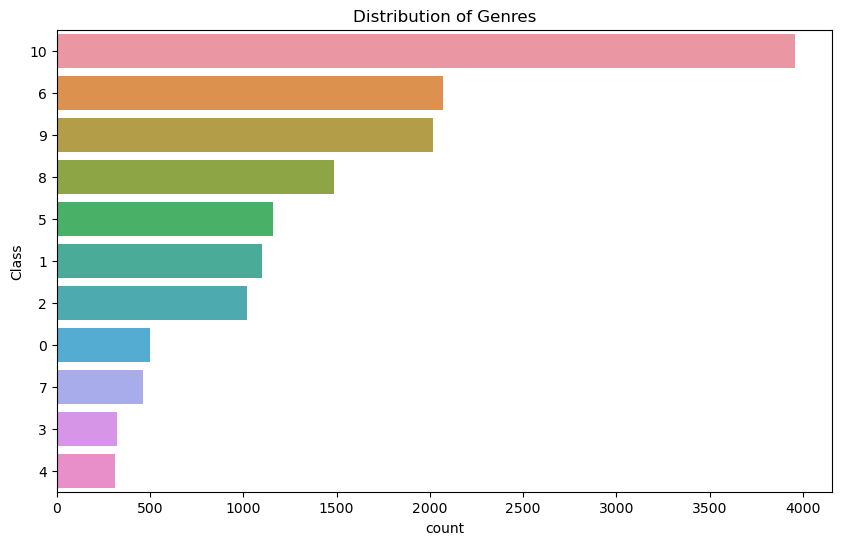

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y='Class', data=train_data, order=train_data['Class'].value_counts().index)
plt.title('Distribution of Genres')
plt.show()


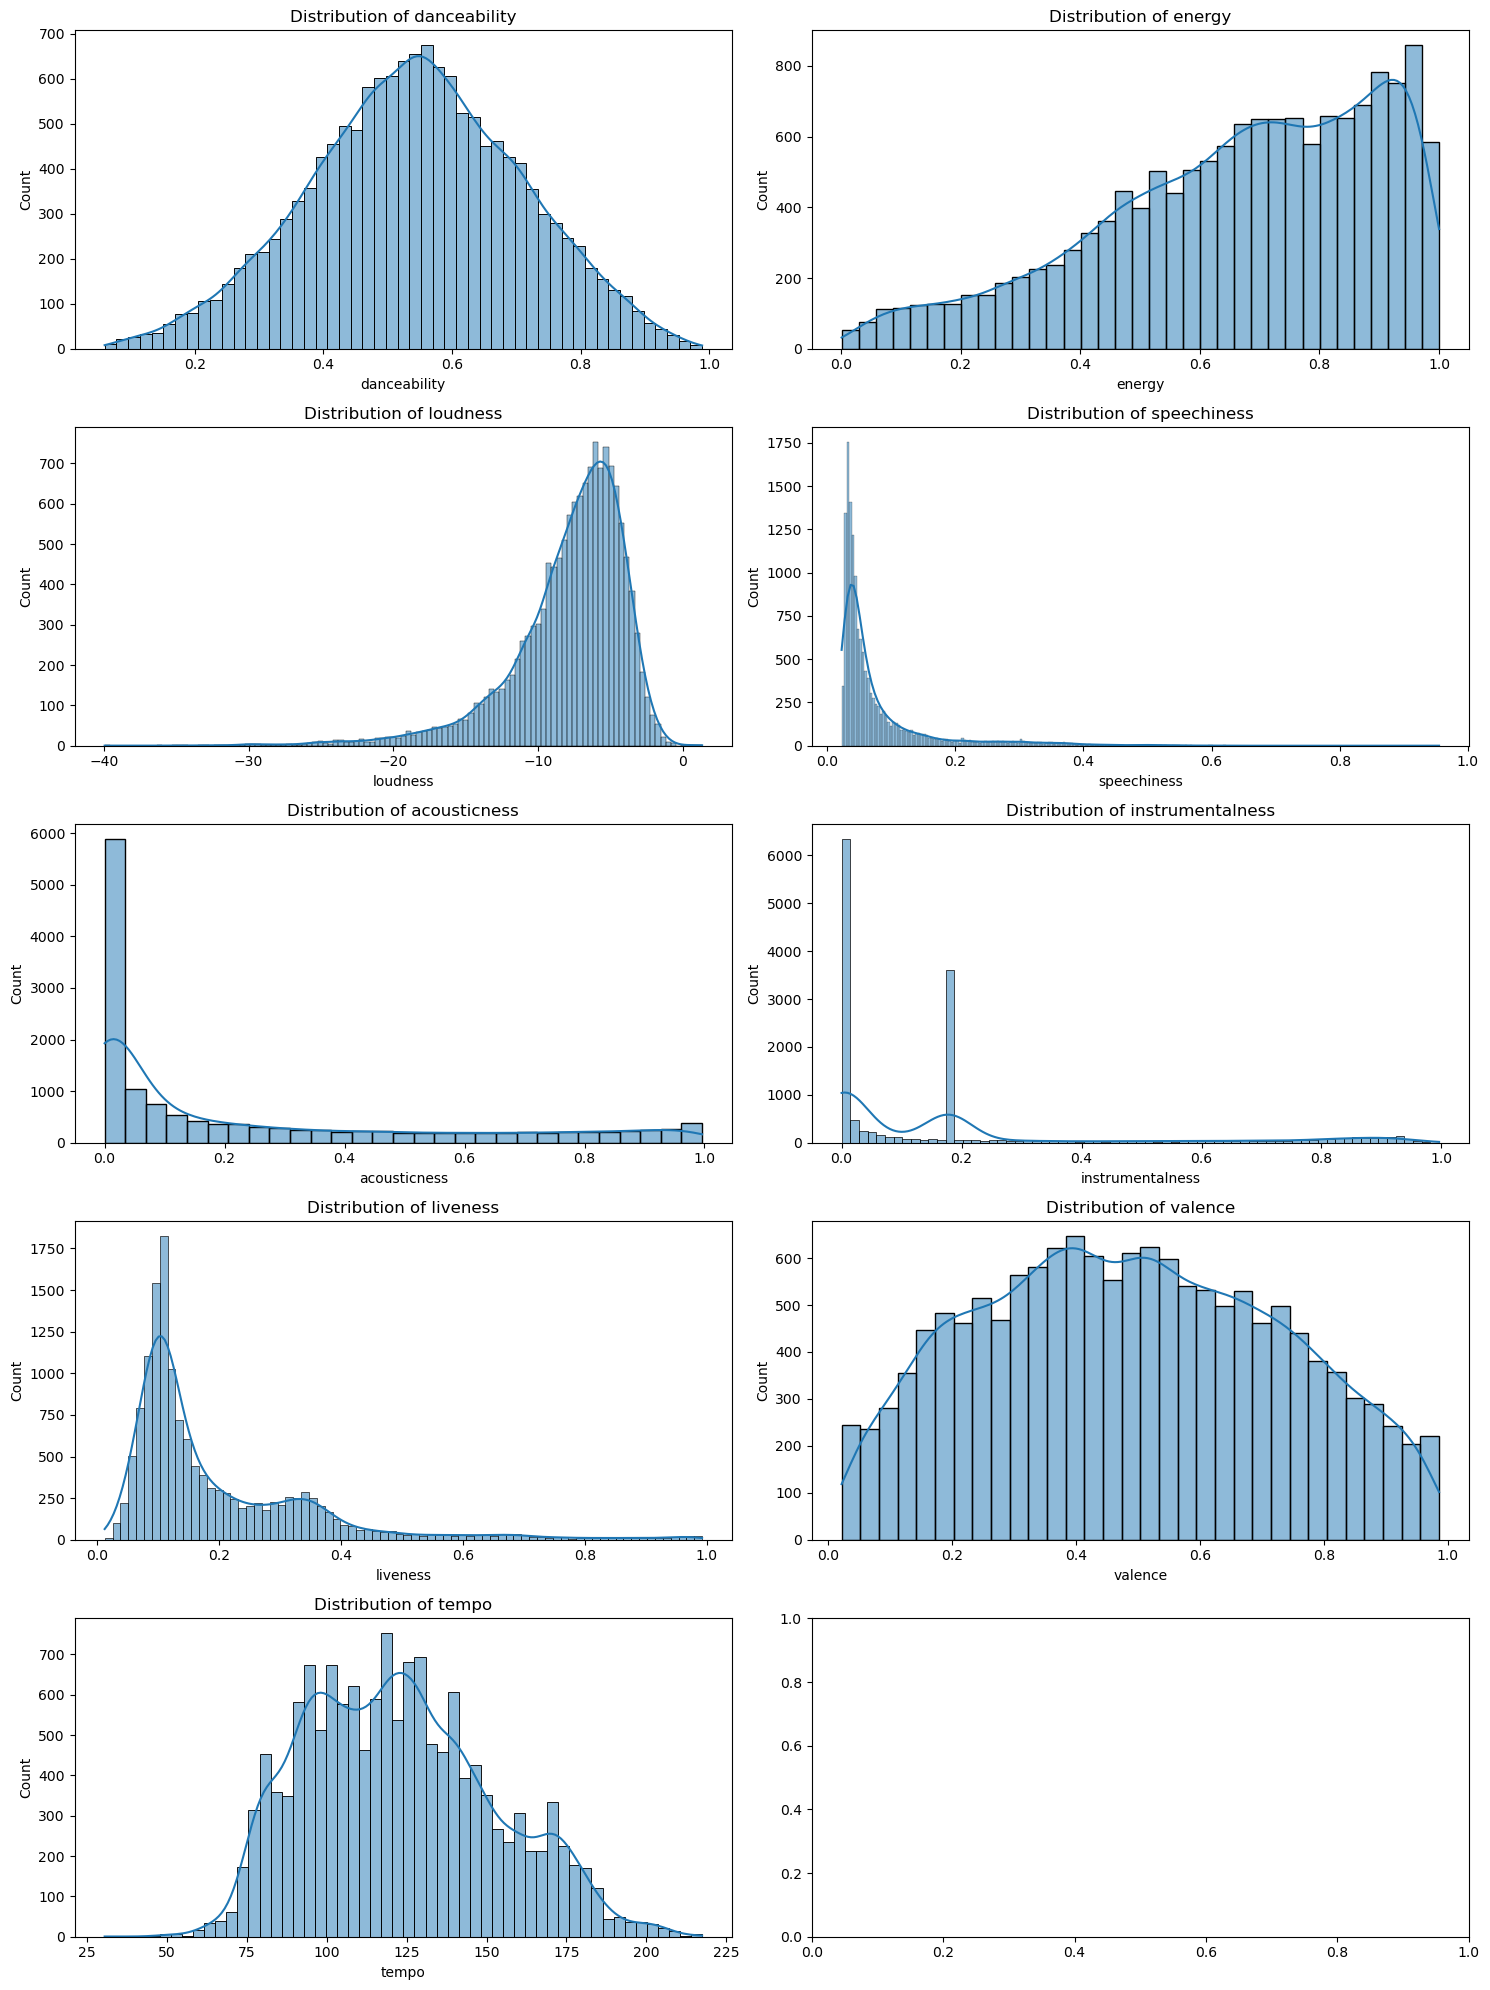

In [8]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    sns.histplot(train_data[feature], kde=True, ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


G:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


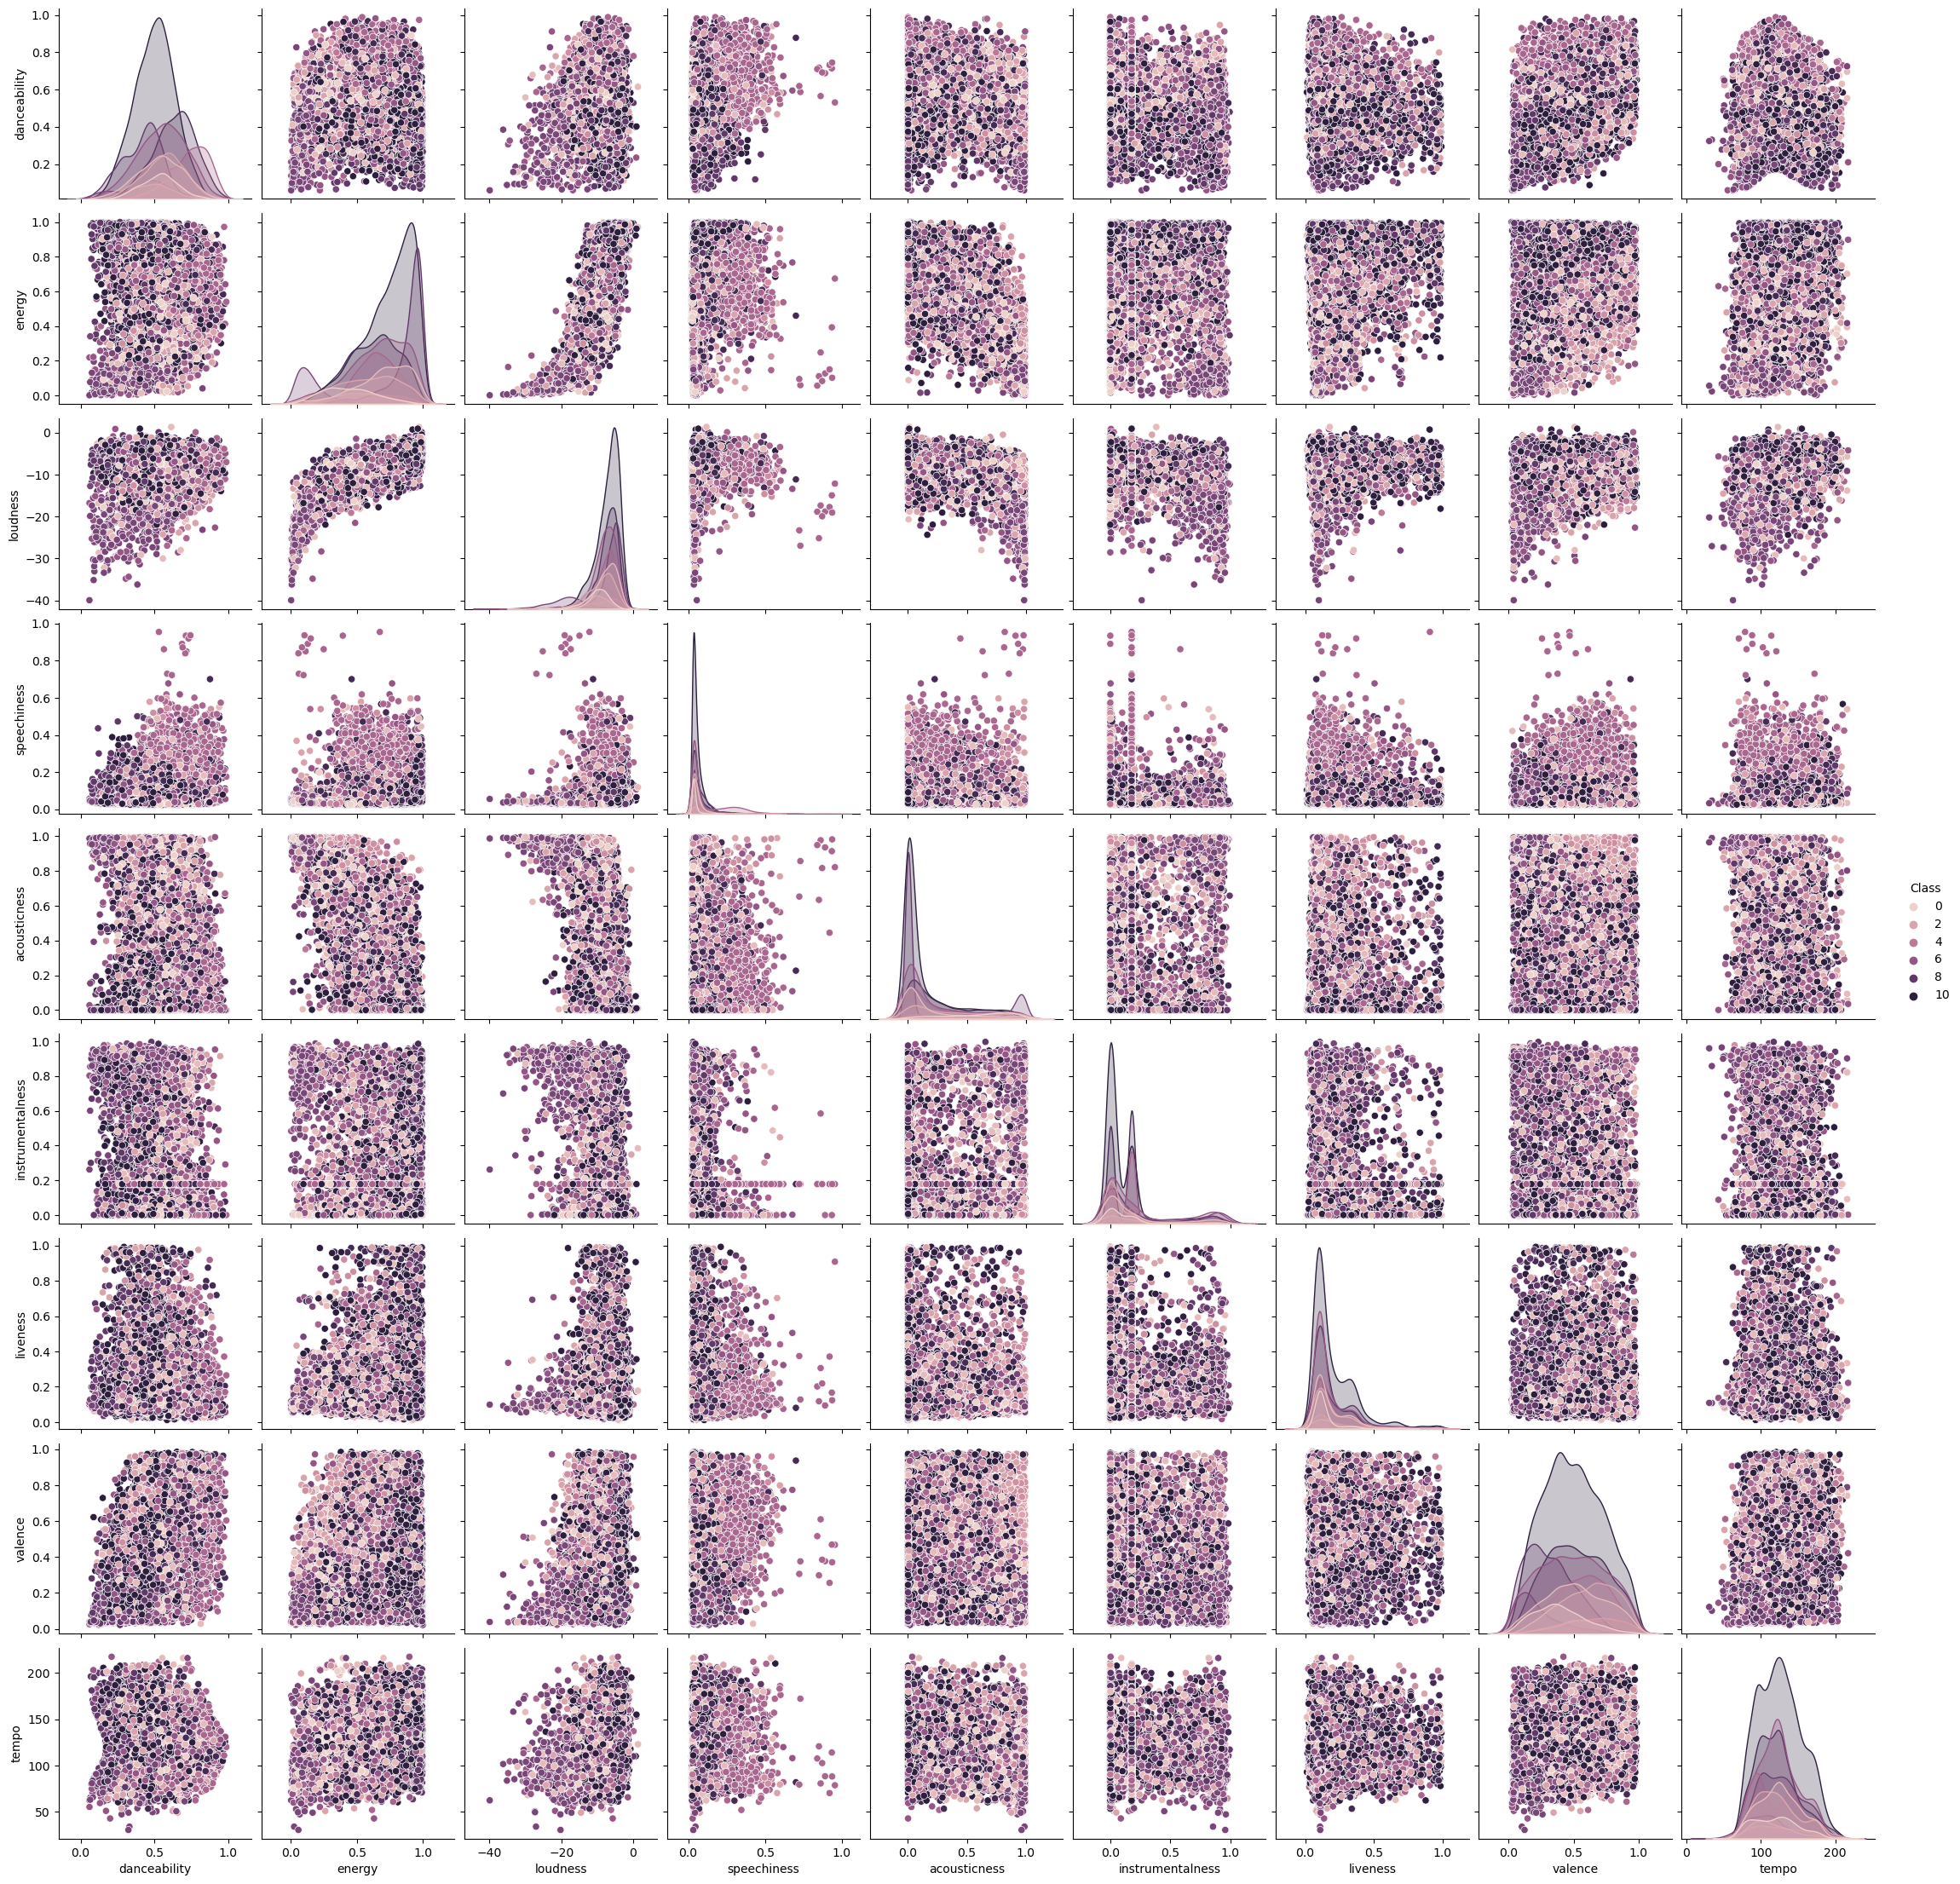

In [9]:
sns.pairplot(train_data[features + ['Class']], hue='Class')
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data['Class'] = label_encoder.fit_transform(train_data['Class'])

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

train_data[features] = scaler.fit_transform(train_data[features])
test_data[features] = scaler.transform(test_data[features])


In [12]:
X_train = train_data[features]
y_train = train_data['Class']
X_test = test_data[features]


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train and evaluate Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_train)
print("Logistic Regression")
print(classification_report(y_train, y_pred_lr))
print("Accuracy:", accuracy_score(y_train, y_pred_lr))

Logistic Regression
              precision    recall  f1-score   support

           0       0.23      0.14      0.17       500
           1       0.00      0.00      0.00      1098
           2       0.28      0.15      0.19      1018
           3       0.50      0.44      0.47       322
           4       0.00      0.00      0.00       310
           5       0.66      0.65      0.65      1157
           6       0.38      0.17      0.23      2069
           7       0.70      0.84      0.76       461
           8       0.56      0.49      0.52      1483
           9       0.38      0.45      0.41      2019
          10       0.41      0.71      0.52      3959

    accuracy                           0.44     14396
   macro avg       0.37      0.37      0.36     14396
weighted avg       0.39      0.44      0.39     14396

Accuracy: 0.43769102528480136


G:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Train and evaluate Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_train)
print("Random Forest")
print(classification_report(y_train, y_pred_rf))
print("Accuracy:", accuracy_score(y_train, y_pred_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       500
           1       0.77      0.69      0.73      1098
           2       0.98      0.96      0.97      1018
           3       1.00      1.00      1.00       322
           4       1.00      0.98      0.99       310
           5       0.98      0.98      0.98      1157
           6       0.86      0.86      0.86      2069
           7       1.00      1.00      1.00       461
           8       0.96      0.94      0.95      1483
           9       0.94      0.94      0.94      2019
          10       0.89      0.93      0.91      3959

    accuracy                           0.92     14396
   macro avg       0.94      0.93      0.94     14396
weighted avg       0.92      0.92      0.92     14396

Accuracy: 0.9176160044456794


In [15]:
# Train and evaluate Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_train)
print("Support Vector Machine")
print(classification_report(y_train, y_pred_svm))
print("Accuracy:", accuracy_score(y_train, y_pred_svm))

Support Vector Machine
              precision    recall  f1-score   support

           0       0.31      0.12      0.18       500
           1       0.50      0.00      0.00      1098
           2       0.47      0.18      0.27      1018
           3       0.66      0.43      0.52       322
           4       0.00      0.00      0.00       310
           5       0.68      0.71      0.70      1157
           6       0.45      0.19      0.26      2069
           7       0.71      0.87      0.78       461
           8       0.64      0.42      0.50      1483
           9       0.44      0.56      0.49      2019
          10       0.42      0.79      0.55      3959

    accuracy                           0.48     14396
   macro avg       0.48      0.39      0.39     14396
weighted avg       0.48      0.48      0.43     14396

Accuracy: 0.4774937482634065


G:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('svm', svm)], voting='hard')
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_train)
print("Ensemble Model")
print(classification_report(y_train, y_pred_ensemble))
print("Accuracy:", accuracy_score(y_train, y_pred_ensemble))


Ensemble Model
              precision    recall  f1-score   support

           0       0.46      0.35      0.40       500
           1       0.80      0.09      0.17      1098
           2       0.55      0.34      0.42      1018
           3       0.72      0.55      0.62       322
           4       0.96      0.14      0.24       310
           5       0.71      0.76      0.73      1157
           6       0.56      0.28      0.37      2069
           7       0.74      0.89      0.81       461
           8       0.67      0.50      0.57      1483
           9       0.53      0.59      0.55      2019
          10       0.47      0.81      0.60      3959

    accuracy                           0.54     14396
   macro avg       0.65      0.48      0.50     14396
weighted avg       0.59      0.54      0.51     14396

Accuracy: 0.5442484023339816


In [17]:
y_pred = ensemble_model.predict(X_test)


In [19]:
submission = pd.DataFrame({
    'Id': test_data['Id'],  
    'Class': label_encoder.inverse_transform(y_pred)  
})

submission.to_csv('my_submission.csv', index=False)